### Is the individual vulnerable to having heart disease?
__Objective:__ Classify an individual's vulnerability to heart disease.

#### The variables included in the dataset are as follows:
> 1. age --> Represented in years
> 2. sex
    * 0: Female
    * 1: Male
> 3. cp = chest pain type
    * 1: Typical Angina
    * 2: Atypical Angina
    * 3: Non-Anginal Pain
    * 4: Asymptomatic
> 4. trestbps = resting blood pressure
    * resting blood pressure (in mm Hg on admission to the hospital)
> 5. chol = serum cholestoral in mg/dl 
> 6. fbs = fasting blood sugar > 120 mg/dl
    * 0: False
    * 1: True
> 7. restecg = resting electrocardiographic results
    * 0: Normal
    * 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: Showing probable or definite left ventricular hypertrophy be Estes' criteria
> 8. thalach = maximum heart rate achieved 
> 9. exang = exercise induced angina
    * 0: No
    * 1: Yes
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. slope = the slope of the peak exercise ST segment 
    * 1: Upsloping
    * 2: Flat
    * 3: Downsloping
> 12. ca = number of major vessels (0-3) colored by flourosopy 
> 13. thal 
    * 3 = normal
    * 2 = fixed defect
    * 1 = reversable defect

In [3]:
# Import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import array
import warnings

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from time import time
from IPython.display import display

warnings.filterwarnings('ignore')
%matplotlib inline

### Exploratory Data Analysis (EDA)

In [4]:
# Read in the dataset
df = pd.read_csv('C:/Users/agupta01/Documents/Personal Projects/heart.csv')

# Display the first 5 instances
print('\nFirst 5 records in the dataset')
df.head()


First 5 records in the dataset


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Summary of the records
print('This dataset has {} samples with {} features each.'.format(df.shape[0],df.shape[1]))

# Describe the data
print('\nStatistical description of the dataset\n-------------------------------------------')
display(df.describe())

# Print out additional dtype information about the variables
print('\nAdditional data type information about the dataset\n-------------------------------')
df.info()

This dataset has 303 samples with 14 features each.

Statistical description of the dataset
-------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Additional data type information about the dataset
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB



Total number of individuals: 303
Individuals with heart disease: 165
Individuals without heart disease: 138
Percentage of individuals with heart disease: 54.46%



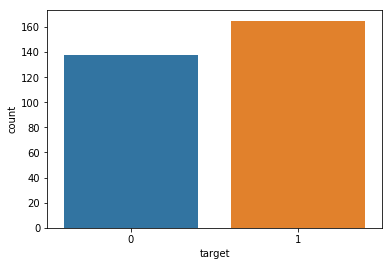

In [4]:
# Understand the balance of the dataset (number of instances per label of the dataset)
# Total number of records
n_records = df.shape[0]

# Number of records and %s with and without heart disease
n_with_heart = df[df['target']==1].shape[0]
n_wo_heart = df[df['target']==0].shape[0]
with_perc = (n_with_heart*100)/float(n_records)
wo_perc = (n_wo_heart*100)/float(n_records)

print('\nTotal number of individuals: {}'.format(n_records))
print('Individuals with heart disease: {}'.format(n_with_heart))
print('Individuals without heart disease: {}'.format(n_wo_heart))
print('Percentage of individuals with heart disease: {:.2f}%\n'.format(with_perc))

# Count of instances per Target label visualization
sns.countplot(df['target'], label='Count')

From the bar chart above, we are able to get a general understanding of whether the dataset that we are looking at is a balanced dataset or not. Since the 2 classes are at around 50%, we can consider this dataset to be a balanced dataset.

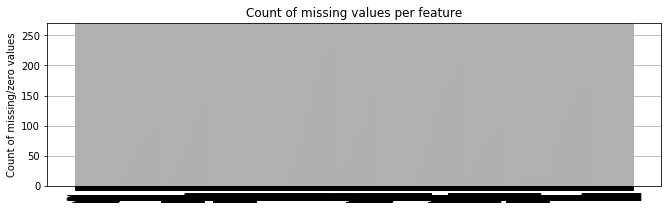

In [5]:
# Count the number of missing or unwanted 0 values across features
featureList = []
count_of_zero_list = []

for col in df:
    count = 0
    for i in df[col]:
        if i == 0:
            count = count + 1
        if col != 'target':
            featureList.append(col)
            count_of_zero_list.append(count)
objects = tuple(featureList)
y_pos = np.arange(len(featureList))
performance = count_of_zero_list

fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 11
fig_size[1] = 3

plt.bar(y_pos, performance, align='center', color = 'b', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Count of missing/zero values')
plt.title('Count of missing values per feature')
plt.grid(True)

plt.show()

Although I attempted creating a histogram of the missing values in the dataset, the fact that there are no bars present in this histogram is an important observation to make. The absense of bars in this histogram essentially means that there are no missing values in this dataset, making the dataset ready for analysis and for the model.

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

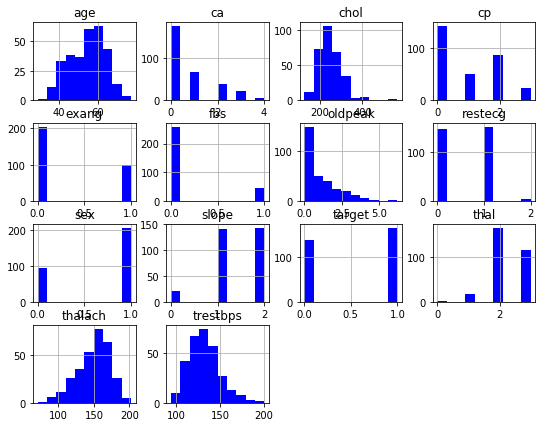

In [6]:
df.hist(figsize=(9,7),color='b')
pd.DataFrame.skew(df, axis=0)

Before building the model, it is important to understand the features individually and in respect to the target column. The histograms above show us distributions of each feature individually so that we are able to get a better understanding of the features before we start the prediction process.

Text(0.5,0.98,'Attribute Correlation Matrix')

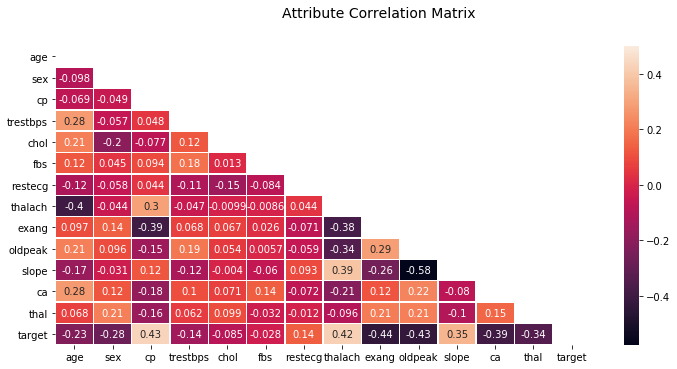

In [7]:
# Calculate correlation
corr = df.corr()

# Plot the correlation matrix
fig = plt.figure(figsize=(12,5.5))

# Mask for upper triangle 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, vmax=0.5, linewidths=0.5)
fig.suptitle('Attribute Correlation Matrix', fontsize=14)

The heatmap displayed above essentially tells us how each feature is correlated to one another. We are more interested in the very last row as it is important to know which features are highly correlated (positively or negatively) to our prediction variable (target). According to the heatmap, we can observe that features like chest pain (cp), maximum heart rate achieved (thalach), exercise induced angina (exang), oldpeak, slope, ca, and thal could possibly drive whether the individual has a heart disease or not.

### Build Model
Build the model using the Decision Tree Classifier.

In [5]:
# Import libraries necessary for building the model
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
 
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import metrics module for accuracy calculation
from sklearn import metrics

In [6]:
# Split the dataset in features and target variable
feature_cols = []
for i in df.columns:
    if i != 'target':
        feature_cols.append(i)
X = df[feature_cols]
y = df.target
# print(feature_cols)
# print(X.head())
# print(y.head())

In [7]:
# Split the dataset into a training dataset and a testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

The dataset was split into a training set and a testing set. 70% of the dataset will be used to train the model, and 30% of the dataset will be used to test the model. 

In [8]:
# Build the model
# Create the Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# Model accuracy, evaluate the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7252747252747253


Based on the data, the choice of classifier (Decision Tree) and the hyperparameters chosen, we can see that we achieve about a 72.5% accuracy rate.

In addition, we can predict the vulnerability of an individual having heart disease on a single instance basis as shown below:

In [10]:
a = [[20,1,2,110,100,0,0,143,0,5.4,1,0,0]]
clf.predict(a)

array([0], dtype=int64)

### Result Visualization


In [1]:
# Import necessary dependencies
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

Although we are able to theoretically understand the Decision Tree classifier as a big picture, the logic used for our dataset and how individuals are actually classified is a still a black box. The visualization below allows us to see the real logic of how individuals are being categorized. The visualization includes aspects such as the Gini index (scoring metric), the condition used as the threshold, and the number of instances that fall in that category.

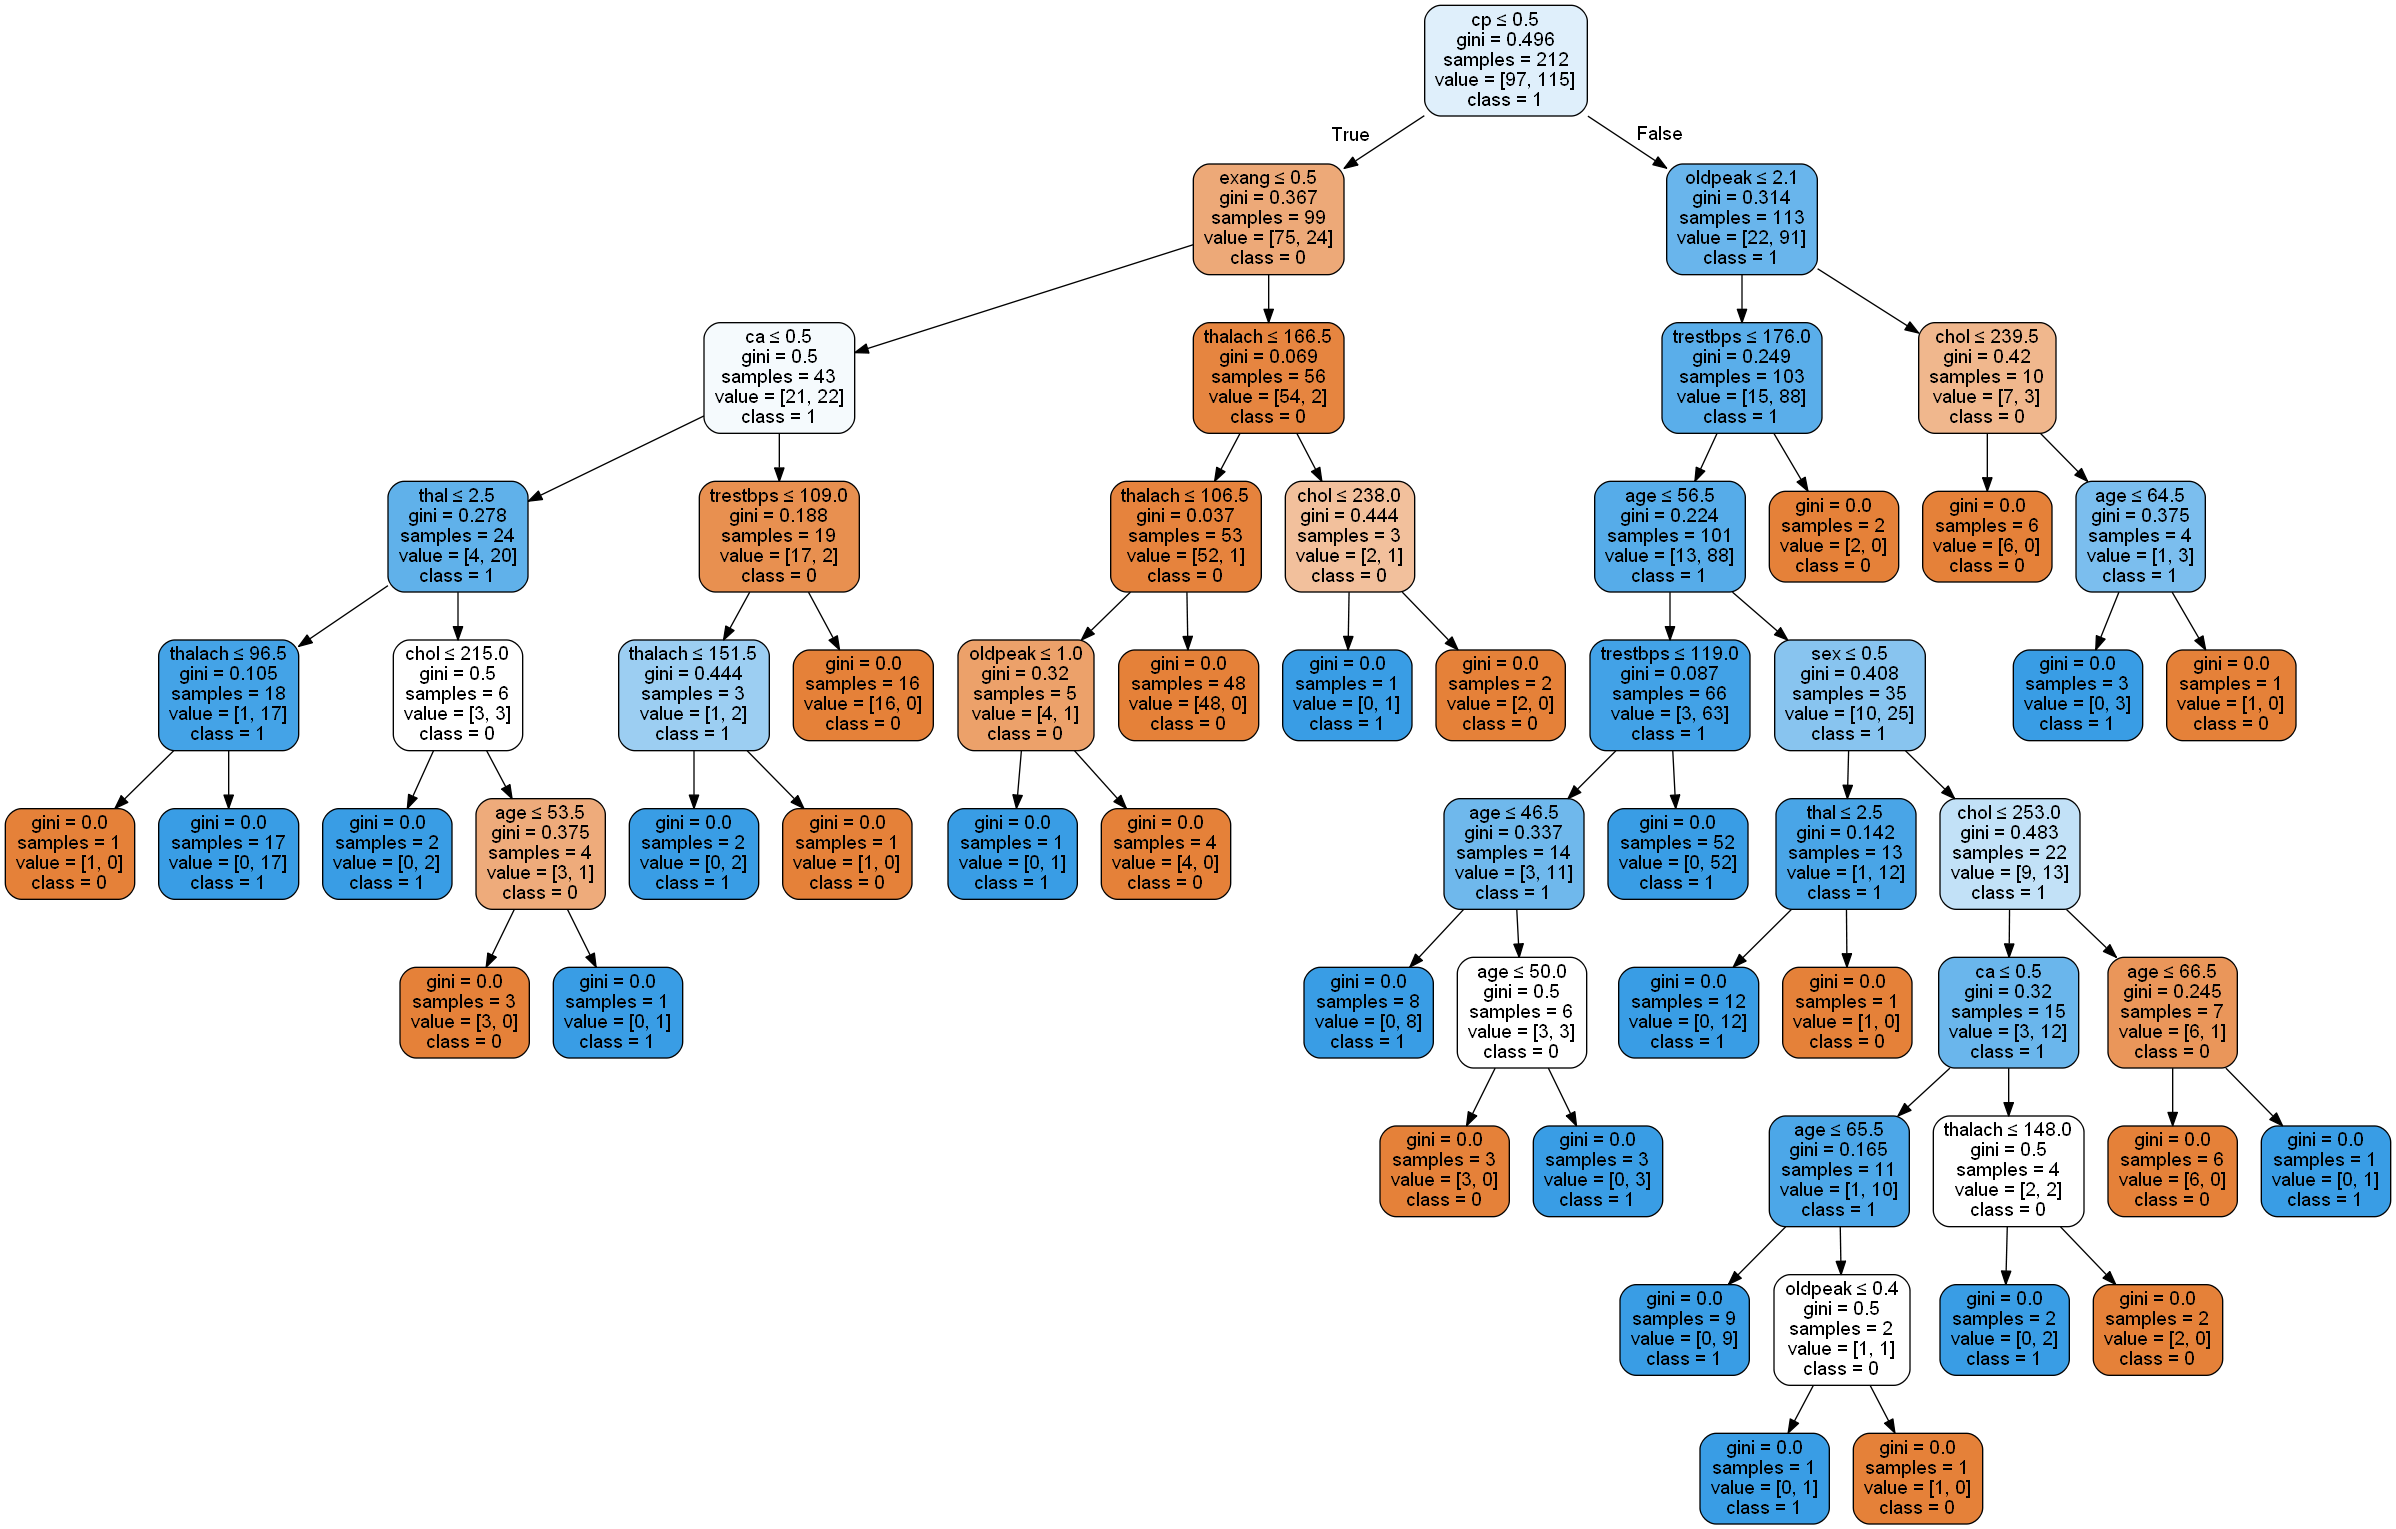

In [11]:
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Model Evaluation


In [12]:
# Import necessary dependencies
from sklearn.metrics import roc_curve, auc

In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7280487804878049

If we were to use the Area Under Curve (AUC) as an evaluation metric, then we would get a value of about 0.728 which essentially means that about 72.8% of the individuals in the dataset fall under the curve of the model.